# Plotting Exercises, Part 1

### Exercise 1

Create a pandas dataframe from the "Datasaurus.txt" file using the code: 

In [1]:
import pandas as pd
import numpy as np

pd.set_option("mode.copy_on_write", True)

df = pd.read_csv(
    "https://raw.githubusercontent.com/nickeubank/practicaldatascience"
    "/master/Example_Data/Datasaurus.txt",
    delimiter="\t",
)

Note that the file being downloaded is *not* actually a CSV file. It is tab-delimited, meaning that within each row, columns are separated by tabs rather than commas. We communicate this to pandas with the `delimiter="\t"` option (`"\t"` is how we write a tab, as we will discuss in future lessons). 

### Exercise 2

This dataset actually contains 13 separate example datasets, each with two variables named `example[number]_x` and `example[number]_y`. 

In order to get a better sense of what these datasets look like, write a loop that iterates over each example dataset (numbered 1 to 13) and print out the mean and standard deviation for `example[number]_x` and `example[number]_y` for each dataset. 

For example, the first iteration of this loop might return something like:

```
Example Dataset 1: 
Mean x: 23.12321978429576, 
Mean y: 98.23980921730972, 
Std Dev x: 21.2389710287, 
Std Dev y: 32.2389081209832,
Correlation: 0.73892819281
```

(Though you shouldn't get those specific values)

In [2]:
for i in range(13):
    print("Example Dataset", i + 1)
    print("Mean x :", df["example" + str(i + 1) + "_x"].mean())
    print("Mean y :", df["example" + str(i + 1) + "_y"].mean())
    print("Std Deviation x :", df["example" + str(i + 1) + "_x"].std())
    print("Std Deviation y :", df["example" + str(i + 1) + "_y"].std())
    print(
        "Correlation of x & y :",
        df["example" + str(i + 1) + "_x"].corr(df["example" + str(i + 1) + "_y"]),
    )
    print("---------------------------------------------------")

Example Dataset 1
Mean x : 54.266099784295776
Mean y : 47.834720624943664
Std Deviation x : 16.769824954043756
Std Deviation y : 26.9397434192671
Correlation of x & y : -0.0641283521673984
---------------------------------------------------
Example Dataset 2
Mean x : 54.268730022394365
Mean y : 47.83082315530282
Std Deviation x : 16.769239493454403
Std Deviation y : 26.935726689918784
Correlation of x & y : -0.06858639424107654
---------------------------------------------------
Example Dataset 3
Mean x : 54.26731970598592
Mean y : 47.83771726725352
Std Deviation x : 16.76001265980608
Std Deviation y : 26.930036087838204
Correlation of x & y : -0.06834335648025565
---------------------------------------------------
Example Dataset 4
Mean x : 54.26327323943662
Mean y : 47.832252816901416
Std Deviation x : 16.76514203911679
Std Deviation y : 26.935403486939116
Correlation of x & y : -0.06447185270095167
---------------------------------------------------
Example Dataset 5
Mean x : 54.260

### Exercise 3

Based only on these results, discuss what might you conclude about these example datasets with your partner. Write down your thoughts.


For the first two decimal places, the mean and standard deviation are similar even though they are different. The correlation is distributed in a similar fashion for datasets. But looking closely, the min, max, quantiles and plots will give a better idea with more information and mean & median do not completely justify the data properly. 


### Execise 4

Write a loop that iterates over these example datasets, and using Altair library, plot a simple scatter plot of each dataset with the `x` variable on the x-axis and the `y` variable on the y-axis.

Hint: When writing this type of code, it is often best to start by writing code to do what you want for the first iteration of the loop. Once you have code that works for the first example dataset, then write the full loop around it. 

Hint 2: To force Jupyter to display your charts when they're generated within a loop, use the method `.show()` (e.g. `my_chart.show()`).

Hint 3: You will need to change the range of the axes to make the plots look good!

In [3]:
import warnings
import altair as alt

warnings.simplefilter(action="ignore", category=FutureWarning)

plot = []

for i in range(1, 13):
    chart = (
        alt.Chart(df)
        .mark_point()
        .encode(
            alt.X("example" + str(i) + "_x", type="quantitative"),
            alt.Y("example" + str(i) + "_y", type="quantitative"),
        )
        .properties(width=200, height=200)
    )
    plot.append(chart)

alt.hconcat(*plot).interactive()

alt.HConcatChart(...)

### Exercise 5

Review you plots. How does your impression of how these datasets differ from what you wrote down in Exercise 3?


We observe that the data have very different distributions. Even though summary statistics seemed to be similar, visualization seems to help in making better conclusions. 

## Economic Development and... Your Choice!

### Exercise 6

Load the World Development Indicator data used in the [plotting reading](https://nickeubank.github.io/practicaldatascience_book/notebooks/class_5/week_2/20_plotting_with_seaborn.html). Rather than picking a single year, pick a single country and look at how GDP per capita and one of the other variables in that dataset have evolved together over time. 

Make any adjustments to the functional forms of your variables and/or axes needed to make the figure legible. 

In [4]:
data = (
    "https://raw.githubusercontent.com/nickeubank/"
    "practicaldatascience/master/Example_Data/wdi_plotting.csv"
)
world = pd.read_csv(data)

world.sample(7)

,Year,Country Name,Country Code,GDP per capita (constant 2010 US$),"Population, total",CO2 emissions (metric tons per capita),"Mortality rate attributed to household and ambient air pollution, age-standardized (per 100,000 population)","PM2.5 air pollution, population exposed to levels exceeding WHO guideline value (% of total)","Life expectancy at birth, total (years)","Mortality rate, under-5 (per 1,000 live births)","Literacy rate, youth female (% of females ages 15-24)"
7728,2006,Morocco,MAR,2512.861366,30804689.0,1.499447,NaN,NaN,72.403000,37.9,NaN
4719,1992,Rwanda,RWA,425.313260,6702239.0,0.071618,NaN,NaN,26.691000,162.6,NaN
9191,2013,Greenland,GRL,44131.251760,56483.0,NaN,NaN,100.0,71.830488,NaN,NaN
6958,2003,Bahrain,BHR,22058.872150,778708.0,23.063844,NaN,NaN,74.999000,11.3,NaN
5254,1995,Costa Rica,CRI,5561.843856,3545524.0,1.356640,NaN,100.0,76.579000,14.8,NaN
2430,1982,Comoros,COM,1459.901697,326944.0,0.145808,NaN,NaN,51.925000,162.6,NaN
5805,1997,Samoa,WSM,2593.084601,172065.0,0.755528,NaN,NaN,67.764000,23.1,NaN


In [5]:
import seaborn.objects as so
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
world["log_gdp_per_cap"] = np.log(world["GDP per capita (constant 2010 US$)"])
world["log_under5"] = np.log(world["Mortality rate, under-5 (per 1,000 live births)"])

In [7]:
# Subsetting data for only one country
portugal_data = world[world["Country Name"] == "Portugal"]
portugal_data.head()

,Year,Country Name,Country Code,GDP per capita (constant 2010 US$),"Population, total",CO2 emissions (metric tons per capita),"Mortality rate attributed to household and ambient air pollution, age-standardized (per 100,000 population)","PM2.5 air pollution, population exposed to levels exceeding WHO guideline value (% of total)","Life expectancy at birth, total (years)","Mortality rate, under-5 (per 1,000 live births)","Literacy rate, youth female (% of females ages 15-24)",log_gdp_per_cap,log_under5
157,1971,Portugal,PRT,9380.530892,8643756.0,1.898036,NaN,NaN,66.770732,63.5,NaN,9.146392,4.151040
374,1972,Portugal,PRT,10148.090920,8630430.0,2.126159,NaN,NaN,68.324390,57.8,NaN,9.225041,4.056989
591,1973,Portugal,PRT,11281.255220,8633100.0,2.317069,NaN,NaN,67.524390,52.4,NaN,9.330898,3.958907
808,1974,Portugal,PRT,11252.130830,8754365.0,2.366235,NaN,NaN,68.019512,47.8,NaN,9.328313,3.867026
1025,1975,Portugal,PRT,10361.568850,9093470.0,2.348565,NaN,NaN,68.309756,43.6,NaN,9.245859,3.775057


Text(0.5, 1.0, "Portugal's Under-5 Mortality Rate over Time")

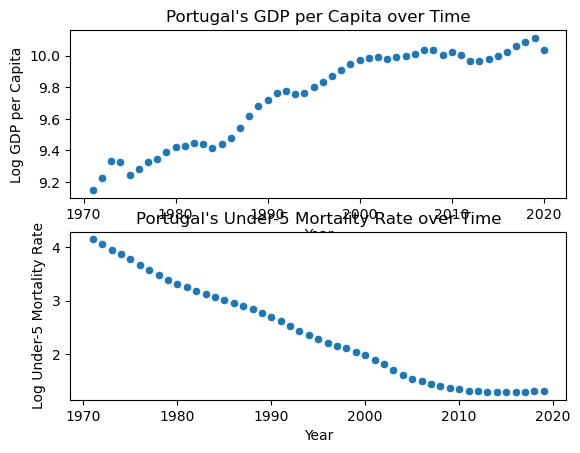

In [8]:
plt.subplot(2, 1, 1)
sns.scatterplot(data=portugal_data, x="Year", y="log_gdp_per_cap")
plt.xlabel("Year")
plt.ylabel("Log GDP per Capita")
plt.title("Portugal's GDP per Capita over Time")


# Creating the second scatter plot with a shared x-axis
plt.subplot(2, 1, 2)

sns.scatterplot(data=portugal_data, x="Year", y="log_under5")
plt.xlabel("Year")
plt.ylabel("Log Under-5 Mortality Rate")
plt.title("Portugal's Under-5 Mortality Rate over Time")

### Exercise 7

Now add a second series. Facet your plot so that the two subplots are positioned so that they are effectively sharing the same time axes (e.g., if you draw a line up from 2010 on one plot, you get to 2010 on the other).

Rather than telling you exactly how to do it, however, I'll point you to the [seaborn tutorial](https://seaborn.pydata.org/tutorial/objects_interface#faceting-and-pairing-subplots). It has examples that don't do exactly what you want, but should be close enough you can guess-and-check to the solution you want!

Use your detective skills (and some guess and check work) to figure out how to get it to work!


In [9]:
Coast_data = world[
    (world["Country Name"] == "Cote d'Ivoire") | (world["Country Name"] == "Portugal")
]

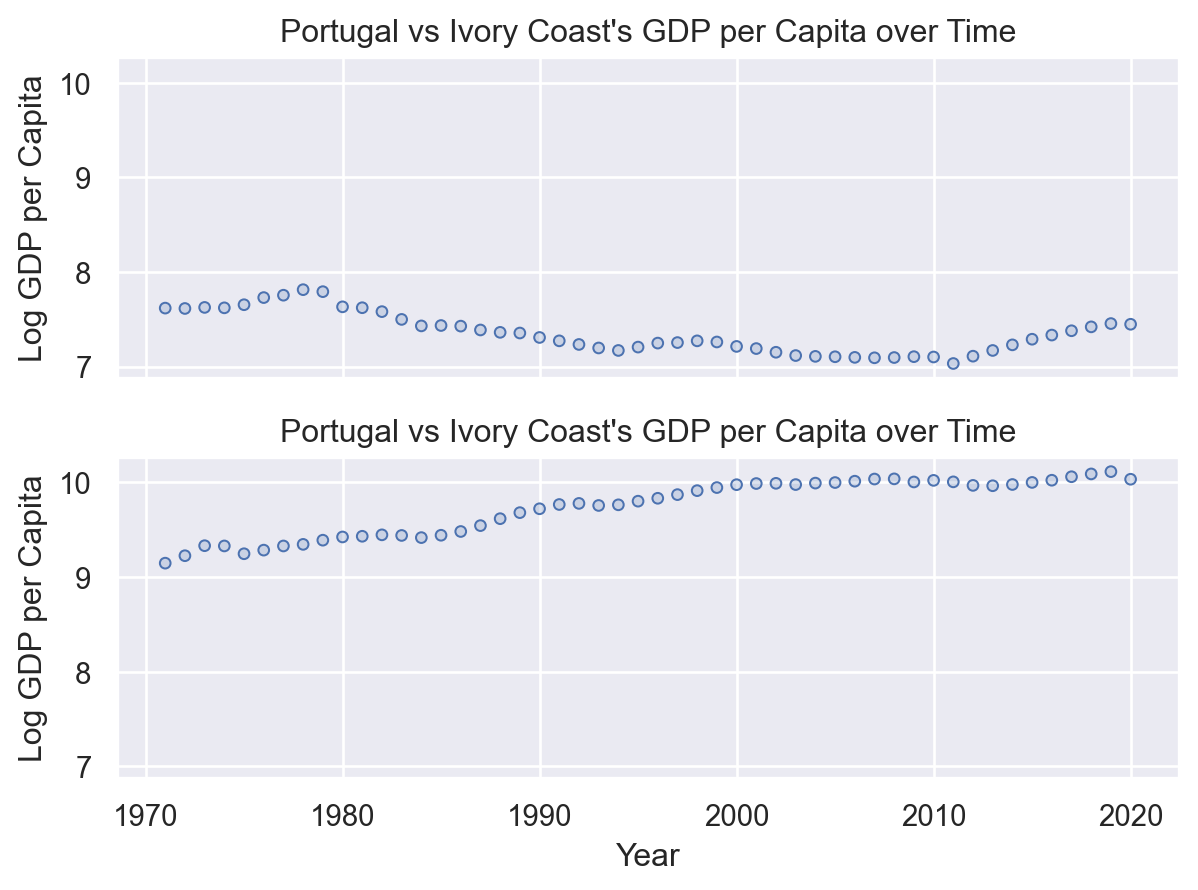

In [10]:
(
    so.Plot(Coast_data, x="Year", y="log_gdp_per_cap")
    .facet(col="Country Name", wrap=1)
    .add(so.Dots())
    .label(
        y="Log GDP per Capita",
        x="Year",
        title="Portugal vs Ivory Coast's GDP per Capita over Time",
    )
)